In [1]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

%load_ext autoreload
import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *
from plotting import *

In [137]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 12
filling_factor_inv = 2
top_shift=3
Nphi = filling_factor_inv*N-top_shift

print('N_phi=',Nphi, 'flux quanta for N_e=',N,'electrons')

#initialization (system configurations and parameters)
system = system(N, Nphi,0,False)

N_phi= 21 flux quanta for N_e= 12 electrons
========Initializing possible states in spherical geometry========
completed in 3.52842116355896 seconds
N = 12 electrons
Nphi = 21 flux quanta



## Gaussian White Noise (Disordered 5/2)

In [3]:
#create noisy hamiltonian with gaussian white noise of specified width
width=0.0001

noise_hamil=hamil+np.random.normal(0,width,hamil.shape)
noise_energies, noise_eigenstates=LA.eigh(noise_hamil)
noise_overlap=overlap_Vectors(np.transpose(eigenstates)[0],np.transpose(noise_eigenstates)[0])

L,ene=L_spectrum(L2,noise_hamil)
L,ene = lowest_ene_spectrum(L,ene,75)

NameError: name 'hamil' is not defined

In [14]:
def overlap_vals(disorder, iterations):
    
    coulomb_temp = []
    trial_temp = []
    
    for i in range(0,iterations):
        noise_hamil=hamil+np.random.normal(0, disorder, hamil.shape)
        noise_energies, noise_eigenstates=LA.eigh(noise_hamil)
        
        noise_overlap_coulomb = overlap_Vectors(np.transpose(eigenstates)[0],np.transpose(noise_eigenstates)[0])
        noise_overlap_trial = overlap_Vectors(np.transpose(trial_eigenstates)[0],np.transpose(noise_eigenstates)[0])

        coulomb_temp.append(noise_overlap_coulomb)
        trial_temp.append(noise_overlap_trial)
        
    return sum(coulomb_temp)/len(coulomb_temp) , sum(trial_temp)/len(trial_temp)

In [59]:
disorder_vals = np.arange(0.001,0.020, 0.001)
coulomb_overlap = []
trial_overlap = []

for i in disorder_vals:
    print(f'Disorder: {i}\n')
    results = overlap_vals(i,50)
    
    coulomb_overlap.append(results[0])
    trial_overlap.append(results[1])

Disorder: 0.001

overlap of wavefunciton <Ψtrial|Ψexact>= 0.9857922756743206
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8179826206191813
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9862486030056455
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8120036504135282
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9845501053881492
overlap of wavefunciton <Ψtrial|Ψexact>= 0.836253496663497
overlap of wavefunciton <Ψtrial|Ψexact>= 0.987506793281811
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8137180438491548
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9822345639436959
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8122665591202247
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9814794166679047
overlap of wavefunciton <Ψtrial|Ψexact>= 0.80036846074301
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9851345983148957
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8237256973666551
overlap of wavefunciton <Ψtrial|Ψexact>= 0.9844803688501129
overlap of wavefunciton <Ψtrial|Ψexact>= 0.8273051138898212
overlap of wavefunciton <Ψt

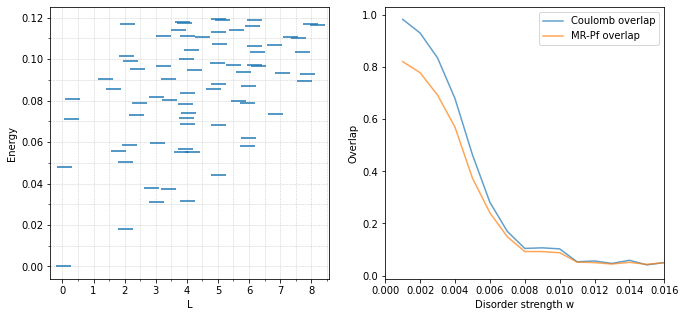

In [70]:
fig, ax = plt.subplots(1,2, figsize=(11, 5))

ax[0].plot(L, ene, ls="none", marker="_", ms="15", mew="1.5")

ax[0].set_xlabel("L")
ax[0].set_ylabel("Energy")

ax[1].set_xlabel("Disorder strength w")
ax[1].set_ylabel("Overlap")

ax[0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))

ax[0].grid(which='major', color='black', linestyle='--', linewidth=0.5,alpha=0.2)
ax[0].grid(which='minor', color='black', linestyle='--', linewidth=0.5,alpha=0.2)

ax[1].plot(disorder_vals, coulomb_overlap, alpha=0.7,label="Coulomb overlap")
ax[1].plot(disorder_vals, trial_overlap,alpha=0.7,label="MR-Pf overlap")

ax[1].set_xlim(0,0.016)
ax[1].legend()


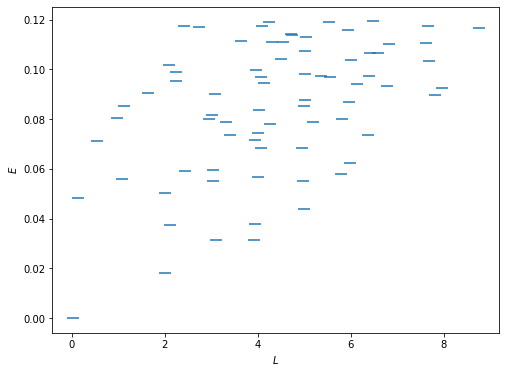

overlap of wavefunciton <Ψtrial|Ψexact>= 0.9997543038937953


In [12]:
#create noisy hamiltonian with gaussian white noise of specified width
width=0.0001

noise_hamil=hamil+np.random.normal(0,width,hamil.shape)
noise_energies, noise_eigenstates=LA.eigh(noise_hamil)

#np.save('N8_noise_spectrum.npy',(noise_energies,noise_eigenstates))

plot_L2_spectrum(hamil=noise_hamil,
                 L2=system.L2.A,
                 title='',
                 figsize=(8,6),sorted=True, 
                 lim=75)

noise_overlap=overlap_Vectors(np.transpose(eigenstates)[0],np.transpose(noise_eigenstates)[0])

# Entanglement Spectrum

In [3]:
from scipy.sparse.linalg import eigs, eigsh
from scipy import sparse

width = 0.01

In [180]:
hamil = np.load("./data/N12_MRHamil.npy")
disordered_hamil = hamil + np.random.normal(0,width,hamil.shape)

hamil = sparse.csr_matrix(hamil)
disordered_hamil = sparse.csr_matrix(disordered_hamil)

In [181]:
energies, eigenstates = eigs(hamil,which = 'SR', k=1)
psi = eigenstates[:,0].reshape(len(eigenstates[:,0]))

In [183]:
nergies, disordered_eigenstates = eigsh(disordered_hamil,
                                       which = 'SM',
                                       k=1)
disordered_psi = disordered_eigenstates[:,0].reshape(len(disordered_eigenstates[:,0]))

In [5]:
Norb=Nphi+1
mzvals=system.mzvals
subsystemA = np.arange(10,22,dtype=int)
NA=int(6)
LzAvec = np.arange(24,49) #noninclusive endpoint 

#pure Hamiltonian
ent_spec=system.entanglement_spectrum(psi,subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

NameError: name 'psi' is not defined

Calculating entanglement spectrum for NA = 6, LzA = [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] ...


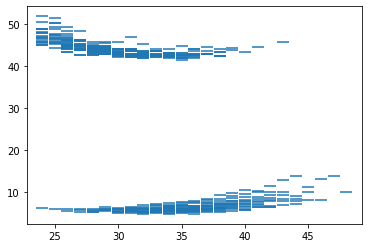

In [185]:
Norb=Nphi+1
mzvals=system.mzvals
subsystemA = np.arange(10,22,dtype=int)
NA=int(6)
LzAvec = np.arange(24,49) #noninclusive endpoint 

#pure Hamiltonian
ent_spec=system.entanglement_spectrum(disordered_psi,subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

#plt.xlim(25,40)
#plt.ylim(0,10)

Calculating entanglement spectrum for NA = 6, LzA = [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] ...


/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(2.0, 10.0)

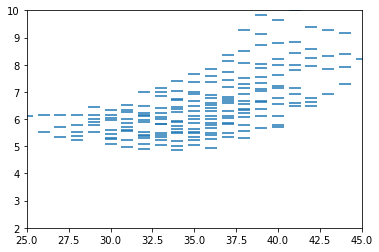

In [209]:
Norb=Nphi+1
mzvals=system.mzvals
subsystemA = np.arange(10,22,dtype=int)
NA=int(6)
LzAvec = np.arange(24,49) #noninclusive endpoint 

#pure Hamiltonian
ent_spec=system.entanglement_spectrum(disordered_psi,subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")

plt.xlim(25,45)
plt.ylim(2,10)

In [18]:
#run above script for several different entanglement spectrums
from scipy.sparse.linalg import eigs, eigsh
from scipy import sparse

disorder_strength = np.arange(0,0.01,0.0005)

hamil = np.load("./data/N12_MRHamil.npy")

Norb=Nphi+1
mzvals=system.mzvals
subsystemA = np.arange(10,22,dtype=int)
NA=int(6)
LzAvec = np.arange(24,48)

disordered_ent_spec = []


for strength in disorder_strength:
    print(f'Disorder strength: {strength}')
    
    print('\nConstructing disordered Hamil matrix')
    disordered_hamil = hamil + np.random.normal(0,strength,hamil.shape)
    disordered_hamil = sparse.csr_matrix(disordered_hamil)
    
    print('\nDiagonalizing...')
    disordered_energies, disordered_eigenstates = eigsh(disordered_hamil, which = 'SM', k=1)
    disordered_psi = disordered_eigenstates[:,0].reshape(len(disordered_eigenstates[:,0]))
    
    ent_spec = system.entanglement_spectrum(disordered_psi,subsystemA,NA,LzAvec)
    disordered_ent_spec.append(ent_spec)

Disorder strength: 0.0

Constructing disordered Hamil matrix

Diagonalizing...
Calculating entanglement spectrum for NA = 6, LzA = [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] ...
Disorder strength: 0.0005

Constructing disordered Hamil matrix

Diagonalizing...
Calculating entanglement spectrum for NA = 6, LzA = [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] ...
Disorder strength: 0.001

Constructing disordered Hamil matrix

Diagonalizing...
Calculating entanglement spectrum for NA = 6, LzA = [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] ...
Disorder strength: 0.0015

Constructing disordered Hamil matrix

Diagonalizing...
Calculating entanglement spectrum for NA = 6, LzA = [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] ...
Disorder strength: 0.002

Constructing disordered Hamil matrix

Diagonalizing...
Calculating entanglement spectrum for NA = 6, LzA = [24 25 26 27 28 29 30 3

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

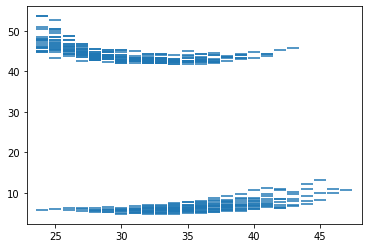

In [37]:
fig, ax = plt.subplots()
i = 19
ax=plt.plot(disordered_ent_spec[i][:,0], disordered_ent_spec[i][:,1], ls="none", marker="_", ms="12", mew="1.5")

#plt.xlim(25,40)
#plt.ylim(0,10)

In [39]:
import pickle

output = open('N12_disordered_ent_spec.pkl', 'wb')
pickle.dump(disordered_ent_spec, output)
output.close()

In [44]:
pkl_file = open('N12_disordered_ent_spec.pkl', 'rb')

disordered_ent_spec= pickle.load(pkl_file)

pkl_file.close()

/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


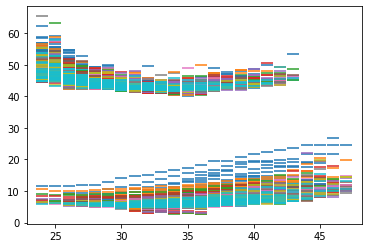

In [50]:
for i in range(0,20):
    ax=plt.plot(disordered_ent_spec[i][:,0], disordered_ent_spec[i][:,1], ls="none", marker="_", ms="12", mew="1.5")


In [83]:
def get_energy_gap(ent_spec):
    energy_levels = []
    for i in range(0,len(ent_spec)):
        if ent_spec[i,0] == 36:
            energy_levels.append(ent_spec[i,1])

    energy_levels.sort()

    return energy_levels[1] - energy_levels[0]

/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


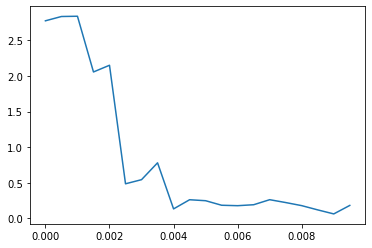

In [88]:
energy_gaps = []
for i in range(0,len(disordered_ent_spec)):
    energy_gaps.append(get_energy_gap(disordered_ent_spec[i]))
    
plt.plot(disorder_strength,energy_gaps)
yhat = savgol_filter(energy_gaps, 10, 3) # window size 51, polynomial order 3

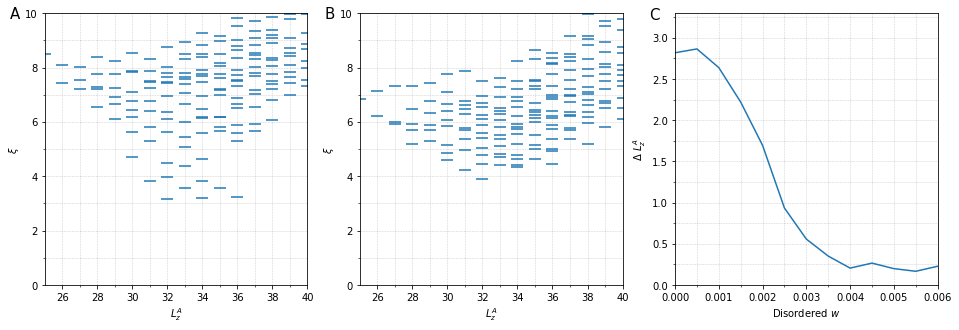

In [184]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(1,3,figsize=(16, 5))

i=3
j=5
ax[0].plot(disordered_ent_spec[i][:,0], disordered_ent_spec[i][:,1], ls="none", marker="_", ms="12", mew="1.5")
ax[1].plot(disordered_ent_spec[j][:,0], disordered_ent_spec[j][:,1], ls="none", marker="_", ms="12", mew="1.5")
ax[2].plot(disorder_strength,yhat)

ax[0].set_xlabel(r"$L_z^A$")
ax[0].set_ylabel(r"$\xi$")

ax[1].set_xlabel(r"$L_z^A$")
ax[1].set_ylabel(r"$\xi$")

ax[2].set_ylabel(r"$\Delta$ $L_z^A$")
ax[2].set_xlabel(r"Disordered $w$")

ax[0].grid(which='major', color='black', linestyle='--', linewidth=0.5,alpha=0.2)
ax[0].grid(which='minor', color='black', linestyle='--', linewidth=0.5,alpha=0.2)
ax[1].grid(which='major', color='black', linestyle='--', linewidth=0.5,alpha=0.2)
ax[1].grid(which='minor', color='black', linestyle='--', linewidth=0.5,alpha=0.2)
ax[2].grid(which='major', color='black', linestyle='--', linewidth=0.5,alpha=0.2)
ax[2].grid(which='minor', color='black', linestyle='--', linewidth=0.5,alpha=0.2)

ax[0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[2].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[2].yaxis.set_minor_locator(AutoMinorLocator(2))

ax[0].set_xlim(25, 40)
ax[0].set_ylim(0, 10)

ax[1].set_xlim(25, 40)
ax[1].set_ylim(0, 10)

ax[2].set_xlim(0, 0.006)
ax[2].set_ylim(0, 3.3)


ax[0].text(23, 9.8, 'A', fontsize=15)
ax[1].text(23, 9.8, 'B', fontsize=15)
ax[2].text(-0.0006, 3.22, 'C', fontsize=15)

plt.show()

/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/scipy/signal/_savitzky_golay.py:339: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


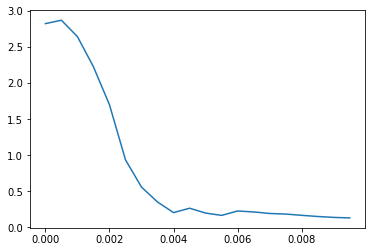

In [91]:
from scipy.signal import savgol_filter


yhat = savgol_filter(energy_gaps, 10, 3) # window size 51, polynomial order 3
plt.plot(disorder_strength,yhat)

i=0
ax=plt.plot(disordered_ent_spec[i][:,0], disordered_ent_spec[i][:,1], ls="none", marker="_", ms="12", mew="1.5")
plt.ylim(0,10)

plt.plot(disorder_strength,yhat)

In [157]:
disorder_strength[5]

0.0025

## MR-Pf Entanglement Spectrum

In [5]:

filename = "MR-Pf12_Trial_eigenstates.npy"
eigenstates=np.load(filename)

trial_psi = eigenstates[:,0]

In [176]:
Norb=Nphi+1
mzvals=system.mzvals
subsystemA = np.arange(22-10,22,dtype=int)
NA=int(4)
LzAvec = np.arange(12,40) #noninclusive endpoint 

#pure Hamiltonian
ent_spec=system.entanglement_spectrum(trial_psi,subsystemA,NA,LzAvec)
fig, ax = plt.subplots()
ax=plt.plot(ent_spec[:,0], ent_spec[:,1], ls="none", marker="_", ms="12", mew="1.5")



Calculating entanglement spectrum for NA = 4, LzA = [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39] ...


IndexError: index 0 is out of bounds for axis 0 with size 0

In [9]:
filename='./data/N12_MRHamil.npy'
hamil = np.load(filename)

hamil = sparse.csr_matrix(hamil)
energies, psi = eigsh(hamil, which = 'SM', k=1)

filename='N12_eigenstate.npy'
eigenstate = np.load(filename)

In [10]:
overlap_Vectors(psi[:,0],eigenstate)

overlap of wavefunciton <Ψtrial|Ψexact>= 1.0000000000000009


1.0000000000000009